# Linear Regression Example
* https://github.com/aymericdamien/TensorFlow-Examples/

In [27]:
import tensorflow as tf
tf.__version__

'1.13.2'

In [28]:
import numpy as np
import matplotlib.pyplot as plt
rng=np.random

In [29]:
learning_rate=0.01
trainning_epochs=1000
display_step=50

In [30]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [31]:
X=tf.placeholder("float")
Y=tf.placeholder("float")

W=tf.Variable(rng.randn(),name="weight")
b=tf.Variable(rng.randn(),name="bias")

In [32]:
pred=tf.add(tf.multiply(X,W),b)

In [33]:
# MSE
# cost=tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)
cost=tf.reduce_mean(tf.square(pred-Y))
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


In [34]:
init=tf.global_variables_initializer()

Epoch: 0050 cost= 0.346591145 W= 0.17144276 b= 0.90147895
Epoch: 0100 cost= 0.345019519 W= 0.1693356 b= 0.9189735
Epoch: 0150 cost= 0.344901204 W= 0.16917174 b= 0.9203336
Epoch: 0200 cost= 0.344892025 W= 0.16915902 b= 0.9204392
Epoch: 0250 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0300 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0350 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0400 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0450 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0500 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0550 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0600 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0650 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0700 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0750 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0800 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0850 cost= 0.344891310 W= 0.1691582 b= 0.92044604
Epoch: 0900 cost= 0.344891310 W

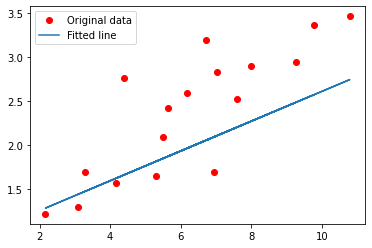

In [35]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(trainning_epochs):
        for(x,y) in zip(train_X,train_Y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        
        if (epoch+1)%display_step==0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()